<a href="https://colab.research.google.com/github/pranabkb/AIML-Course/blob/main/Hackathons/NBFC%20Loan%20Default/NBFC%20Loan%20Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

**Goal:**
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


**Datasets**
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform


**Metric to measure**
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.


**Submission File Format:**
You should submit a CSV file with exactly 39933 entries plus a header row.
The file should have exactly two columns

*         ID ( sorted in any order)

*         default (contains 0 & 1, 1 represents default)


**Train data set file**
* Train_set.csv

**Test data set file**
* Test_set.csv
    
**Sample submission file**
* Sample_Submission_(2).csv

**Additional files**
* Data_Dictionary_(1).csv


**Data Dictionary**

* **ID:** unique ID assigned to each applicant
* **loan_amnt:** loan amount ($) applied each applicant
* **loan_term:** Loan duration in years
* **interest_rate:** Applicable interest rate on Loan in %
* **loan_grade:** Loan Grade Assigned by the bank
* **loan_subgrade:** Loan SubGrade Assigned by the bank
* **job_experience:** Number of years job experience 
* **home_ownership:** Status of House Ownership
* **annual_income:** Annual income of the applicant
* **income_verification_status:** Status of Income verification by the bank
* **loan_purpose:** Purpose of loan
* **state_code:** State code of the applicant's residence 
* **debt_to_income:** Ratio to total debt to income (total debt might include other loan aswell)
* **delinq_2yrs:** number of 30+ days delinquency in past 2 years
* **public_records:** number of legal cases against the applicant
* **revolving_balance:** total credit revolving balance
* **total_acc:** total number of credit lines available in members credit line
* **interest_receive:** total interest received by the bank on the loan
* **application_type:** Whether the applicant has applied the loan by creating individuall or joint account
* **last_week_pay:** How many months have the applicant paid the loan EMI already
* **total_current_balance:** total current balance of all the accounts of applicant
* **total_revolving_limit:** total revolving credit limit
* **default:** "status of loan amount, 1 = Defaulter, 0 = Non Defaulters"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Introductory Steps**

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

### Loading the Data

In [3]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Hackathons/Train_set.csv')

In [4]:
# Checking the number of rows and columns in the data
Data.shape

(93174, 23)

* The dataset has 93174 rows and 23 columns

### Data Overview

In [5]:
# Let's view the first 5 rows of the data
Data.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,SC,31.67,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,TX,19.70,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,debt_consolidation,MO,37.39,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,TX,8.92,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [6]:
# Let's view the last 5 rows of the data
Data.tail()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93169,65577252,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.0,Not Verified,debt_consolidation,FL,17.11,0.0,0.0,7924,38.0,55.34,INDIVIDUAL,13.0,64635.0,47600.0,0
93170,836021,3500,3 years,5.42,A,A1,NaN,MORTGAGE,57550.0,Not Verified,other,FL,22.64,0.0,0.0,10174,24.0,299.67,INDIVIDUAL,161.0,NaN,NaN,1
93171,33058720,8000,3 years,13.98,C,C3,10+ years,RENT,148531.5,Source Verified,credit_card,AK,13.04,1.0,0.0,5391,25.0,1150.58,INDIVIDUAL,65.0,94596.0,6500.0,0
93172,4060472,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.0,Verified,debt_consolidation,CA,17.22,0.0,0.0,24609,45.0,5764.58,INDIVIDUAL,56.0,33759.0,34900.0,1
93173,3628127,10000,3 years,15.80,C,C3,<5 Years,RENT,60000.0,Verified,debt_consolidation,NJ,11.83,0.0,0.0,11285,7.0,2279.36,INDIVIDUAL,104.0,25594.0,12300.0,0


In [7]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

* There are 93174  observations and 23 columns in the data.
* 9 columns are of the object datatype and 14 columns are numerical.


In [8]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

No duplicate row found in the dataframe

In [9]:
# Let's check for missing values in the data
Data.isna().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

No missing value found

In [10]:
Data["default"].value_counts(1)

0    0.762498
1    0.237502
Name: default, dtype: float64

* 76% not default on the loan payment and 24% default on the loan payment.

In [11]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,3.710751e+07,5.859895e+07,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_income,93173.0,7.502826e+04,6.945478e+04,1200.00,45000.00,6.400000e+04,9.000000e+04,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,1.764000e+01,2.389000e+01,672.52
delinq_2yrs,93172.0,3.169944e-01,8.808591e-01,0.00,0.00,0.000000e+00,0.000000e+00,22.00
public_records,93172.0,1.961212e-01,5.811882e-01,0.00,0.00,0.000000e+00,0.000000e+00,49.00
revolving_balance,93174.0,1.685447e+04,2.368907e+04,0.00,6433.00,1.185600e+04,2.074500e+04,2560703.00
total_acc,93172.0,2.524891e+01,1.185506e+01,1.00,17.00,2.400000e+01,3.200000e+01,119.00
interest_receive,93174.0,1.747264e+03,2.088236e+03,0.00,439.88,1.070755e+03,2.219613e+03,23172.31


* `RowNumber`:  RowNumber range from 1 to 10000.
* `CustomerId`: CustomerId range from 15565701 to 15815690.
* `CreditScore`: Average is 650.52, Credit Score range from 350 to 850.
* `Age`: Average is 38.9, Age range from 18 to 92.
* `Tenure`: Average is 5, Tenure range from 0 to 10.
* `NumOfProducts`:  Average is 1, NumOfProducts range from 0 to 4.
* `Balance`: Average is 76485.89, Balance range from 0 to 250898.09.
* `HasCrCard`: HasCrCard range from 0 to 1.
* `IsActiveMember`: IsActiveMember range from 0 to 1.
* `EstimatedSalary`: Average is 100090.20, EstimatedSalary range from 11.58 to 199992.48.
* `Excited`: Excited range from 0 to 1.

In [12]:
# Let's check the number of unique values in each column
Data.nunique()

ID                            93174
loan_amnt                      1310
loan_term                         2
interest_rate                   481
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  8667
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3996
delinq_2yrs                      22
public_records                   15
revolving_balance             35945
total_acc                       102
interest_receive              69122
application_type                  2
last_week_pay                    90
total_current_balance         72306
total_revolving_limit          4469
default                           2
dtype: int64

* Each value of the column 'RowNumber' and 'CustomerId' is a unique identifier for Bank Customers. Hence we can drop this column as it will not add any predictive power or value to the model.
* The 'Surname' column has 2932 unique categories.

In [13]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in loan_term are :
3 years    65211
5 years    27963
Name: loan_term, dtype: int64
**************************************************
Unique values in loan_grade are :
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64
**************************************************
Unique values in loan_subgrade are :
B3    5879
B4    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: loan_subgrade, dtype: int64
**************************************************
Unique values in job_experience are :
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64
*******************

* The 'Surname' column has 2932 unique categories, and the surname with the highest number of customers is Smith.
* Over 50% of the bank customers in this dataset are from France.
* Over 50% of the bank customers are male.

### Data Pre-processing

In [14]:
# ID columns consists of uniques ID for customers and hence will not add value to the modeling
Data.drop(['ID'],axis=1,inplace=True)

## **EDA**

### Univariate Analysis

In [15]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
Data.dtypes

loan_amnt                       int64
loan_term                      object
interest_rate                 float64
loan_grade                     object
loan_subgrade                  object
job_experience                 object
home_ownership                 object
annual_income                 float64
income_verification_status     object
loan_purpose                   object
state_code                     object
debt_to_income                float64
delinq_2yrs                   float64
public_records                float64
revolving_balance               int64
total_acc                     float64
interest_receive              float64
application_type               object
last_week_pay                 float64
total_current_balance         float64
total_revolving_limit         float64
default                         int64
dtype: object

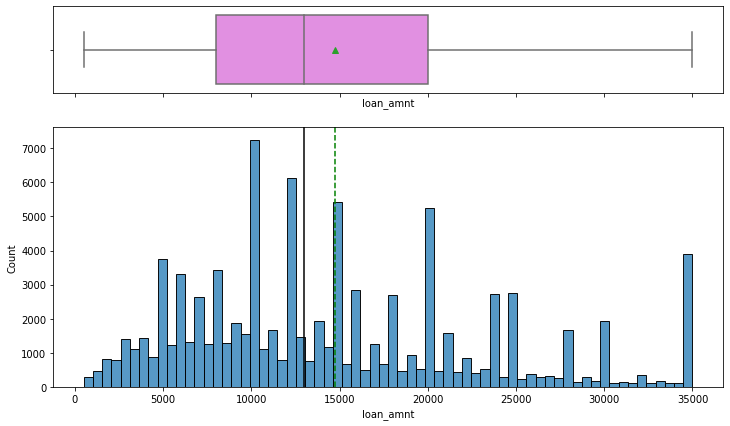

In [17]:
histogram_boxplot(Data, "loan_amnt")

* **CreditScore** is well distributed and median is 652. Also has few outlier.

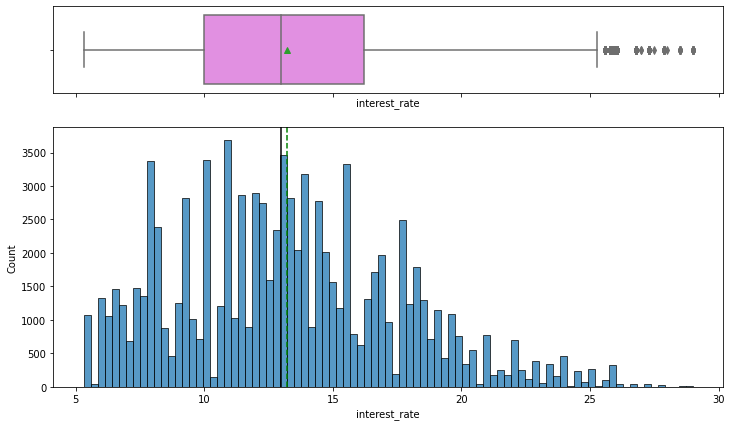

In [18]:
histogram_boxplot(Data, "interest_rate")

* The distribution of **Age** is right-skewed with a median is 37. Also has lots of outlier.

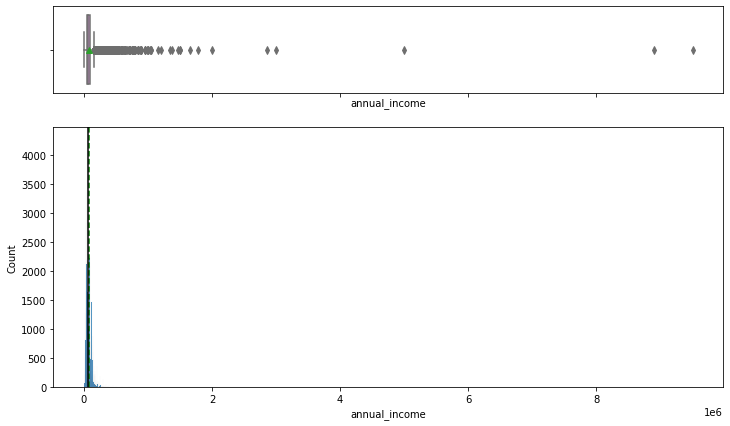

In [19]:
histogram_boxplot(Data, "annual_income")

* The distribution of **Tenure** is well distributed with a median is 5.

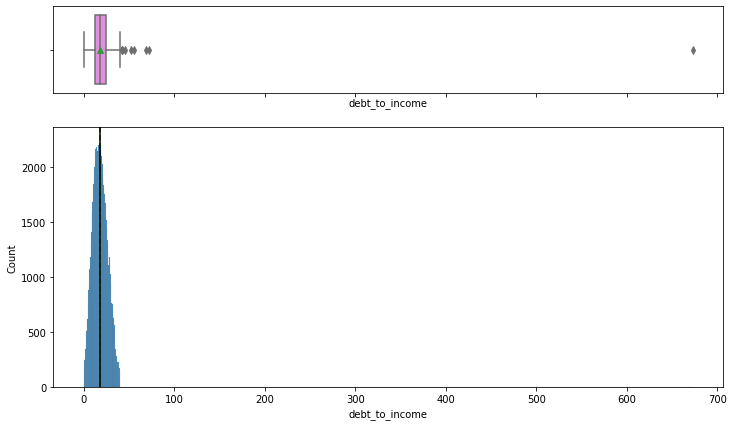

In [20]:
histogram_boxplot(Data, "debt_to_income")

* The distribution of **Balance** is heavily right-skewed with a median is 97198.54. Maximum customers has 0 balance.

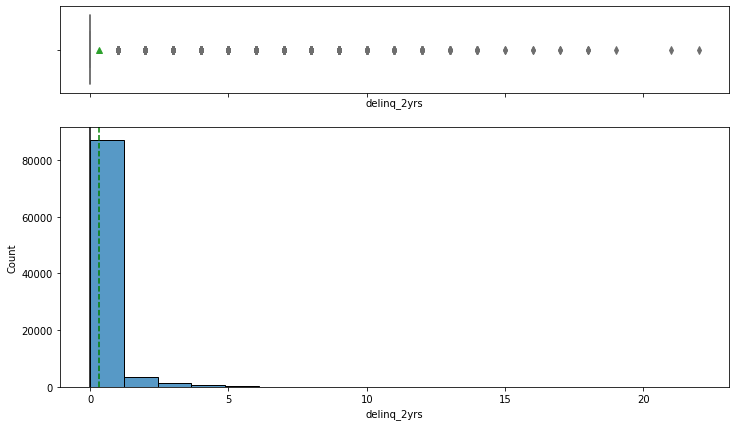

In [21]:
histogram_boxplot(Data, "delinq_2yrs")

* **EstimatedSalary** is well distributed with a median is 100193.90.

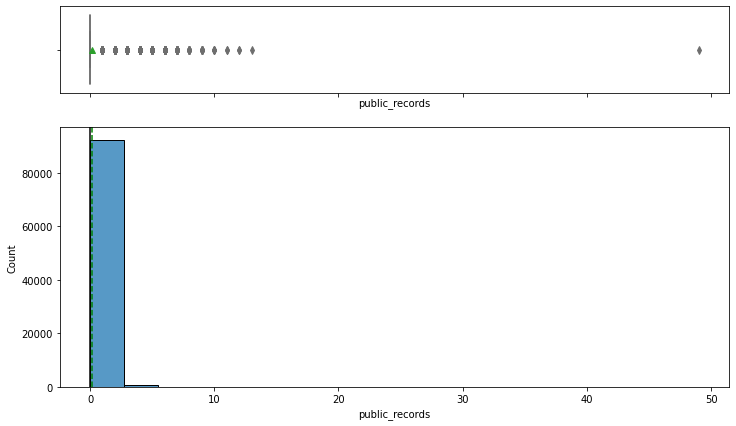

In [22]:
histogram_boxplot(Data, "public_records")

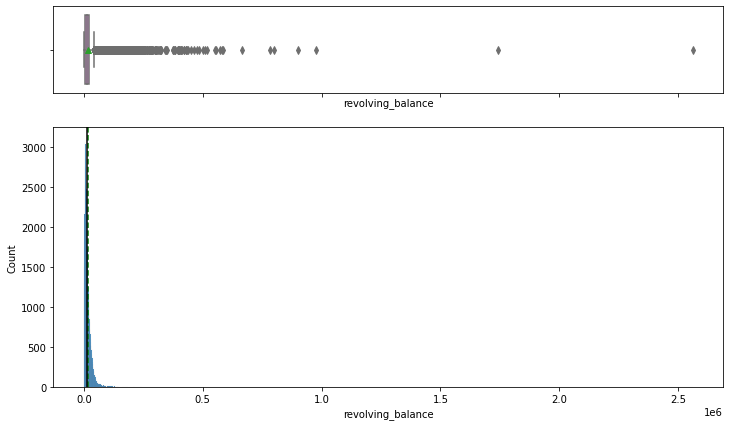

In [23]:
histogram_boxplot(Data, "revolving_balance")

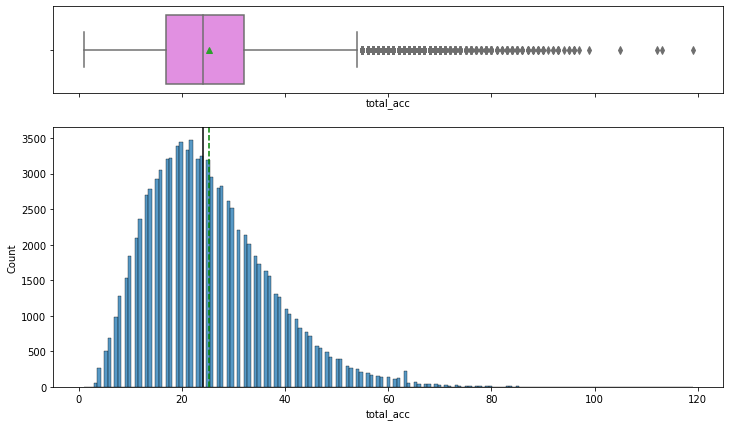

In [24]:
histogram_boxplot(Data, "total_acc")

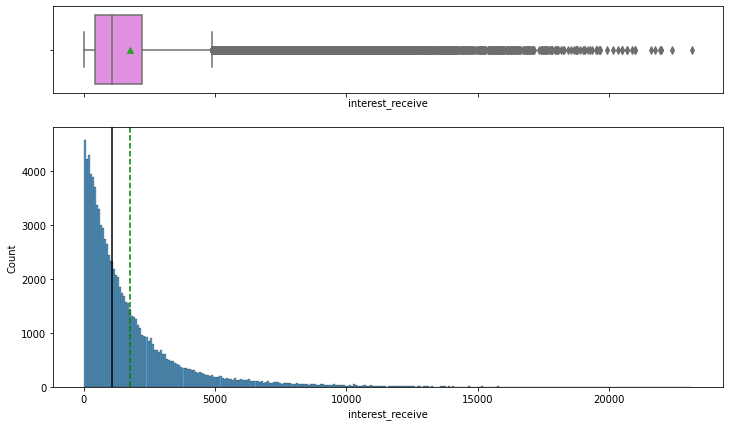

In [25]:
histogram_boxplot(Data, "interest_receive")

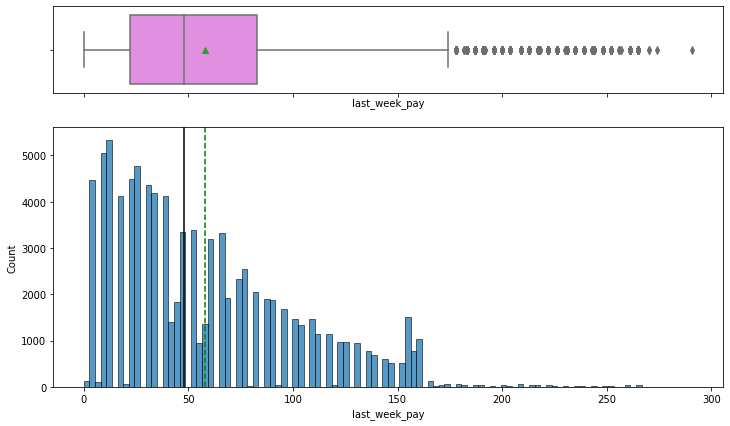

In [26]:
histogram_boxplot(Data, "last_week_pay")

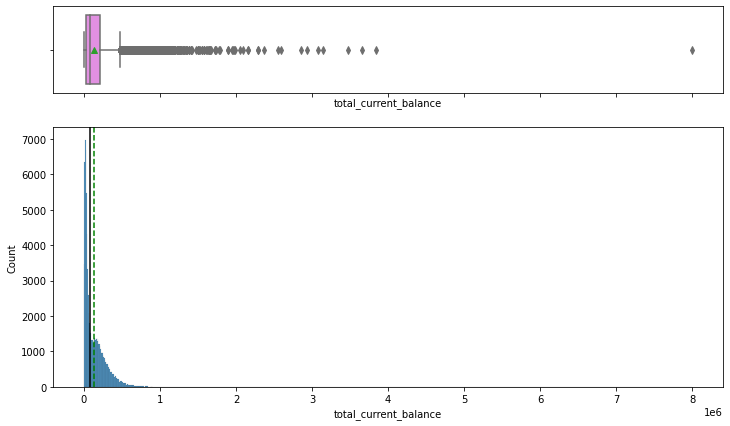

In [27]:
histogram_boxplot(Data, "total_current_balance")

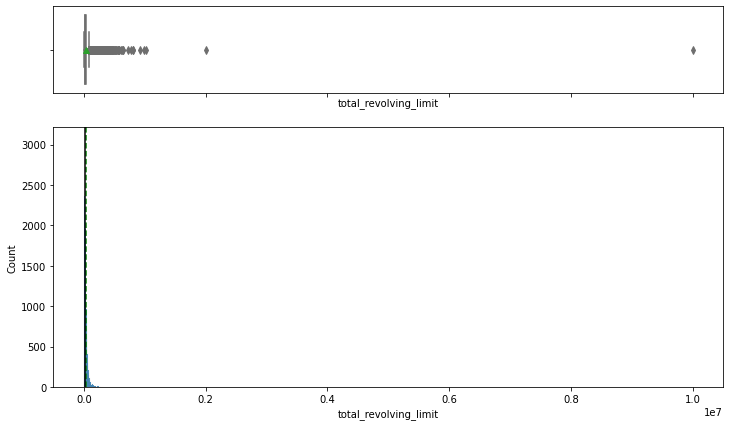

In [28]:
histogram_boxplot(Data, "total_revolving_limit")

In [29]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

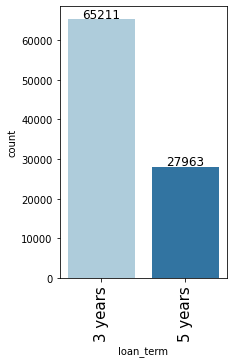

In [30]:
labeled_barplot(Data, "loan_term")

* Most of the customers are from France (~50%).
* Germany and Spain almost has same customers. 

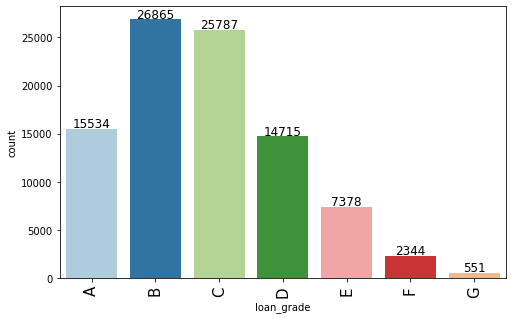

In [31]:
labeled_barplot(Data, "loan_grade")

* ~54% are Male and ~45% are Female.

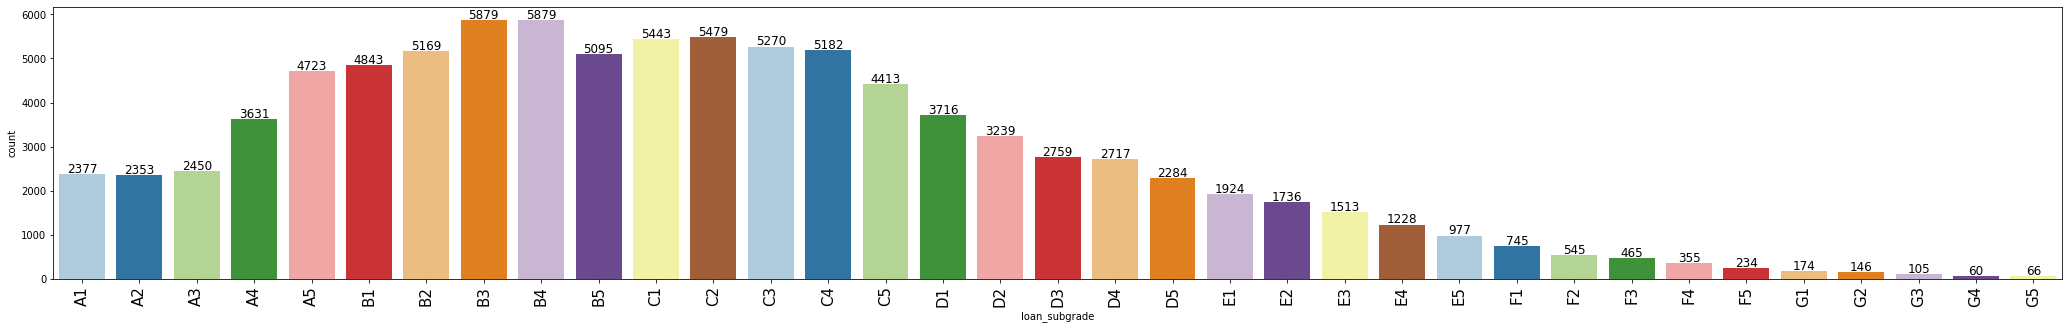

In [32]:
labeled_barplot(Data, "loan_subgrade")



*   ~50% has 1 Product
*   ~46% has 2 Products



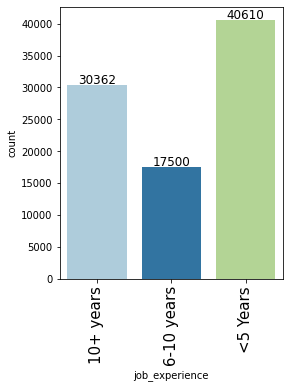

In [33]:
labeled_barplot(Data, "job_experience")



*   More than 70% has Card



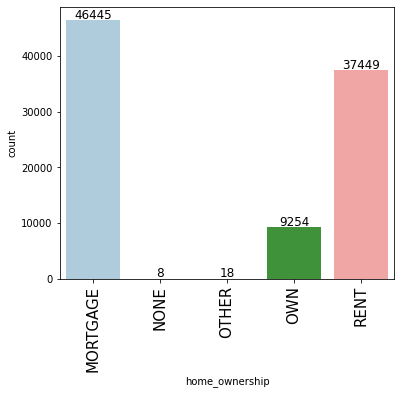

In [34]:
labeled_barplot(Data, "home_ownership")

* ~51% are Active Members

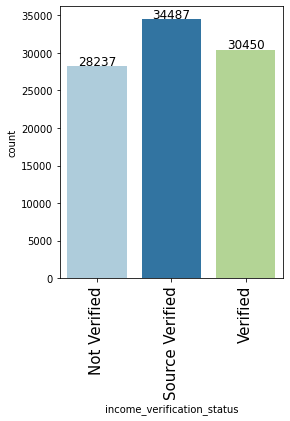

In [35]:
labeled_barplot(Data, "income_verification_status")

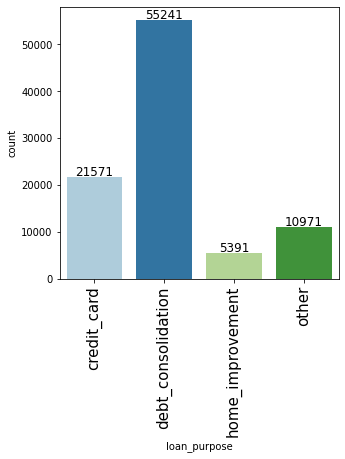

In [36]:
labeled_barplot(Data, "loan_purpose")

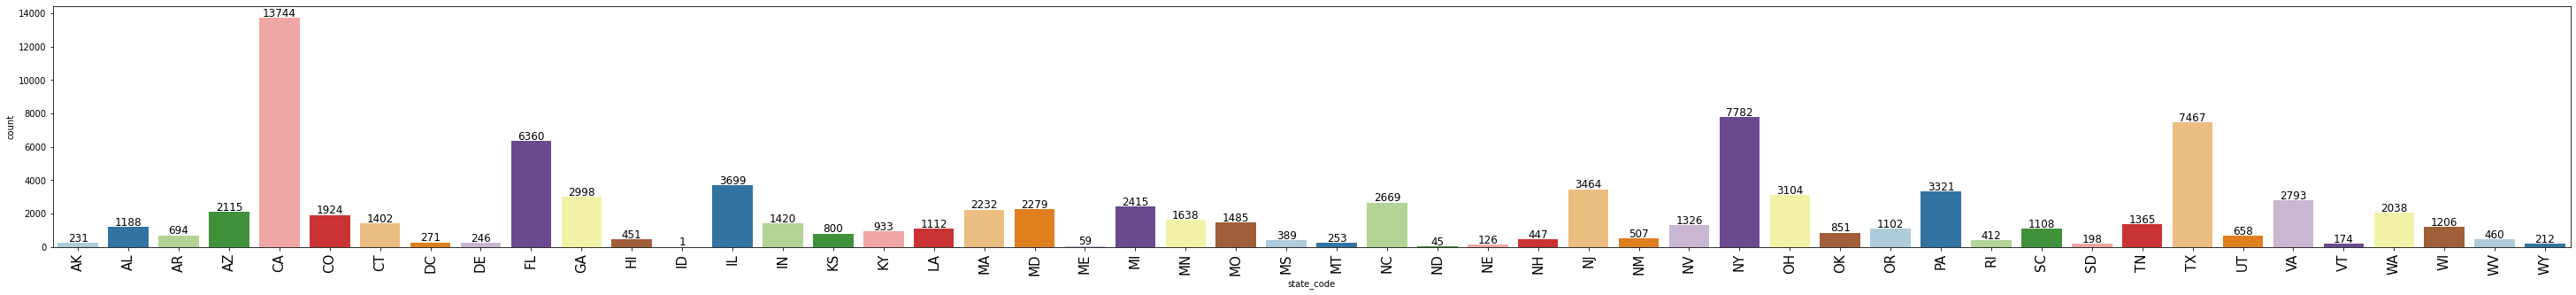

In [37]:
labeled_barplot(Data, "state_code")

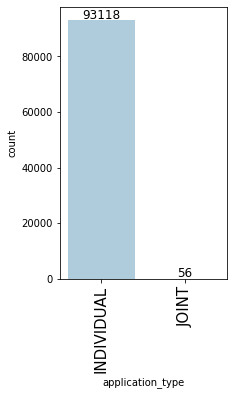

In [38]:
labeled_barplot(Data, "application_type")

0    71045
1    22129
Name: default, dtype: int64


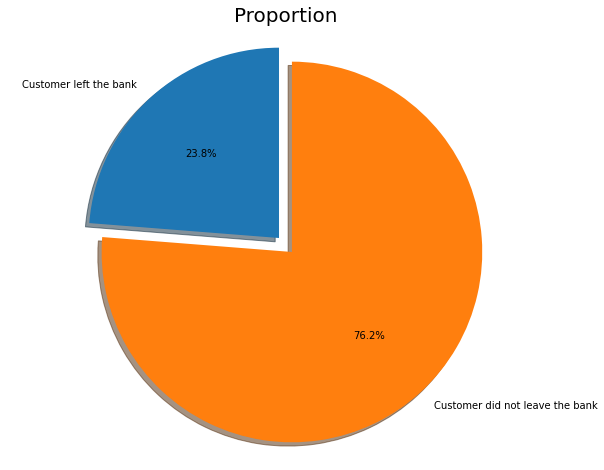

In [39]:
print(Data.default.value_counts())
labels = 'Customer left the bank', 'Customer did not leave the bank'
sizes = [Data.default[Data['default']==1].count(),Data.default[Data['default']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~20% of the customers in this dataset left the bank.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

### Bivariate Analysis

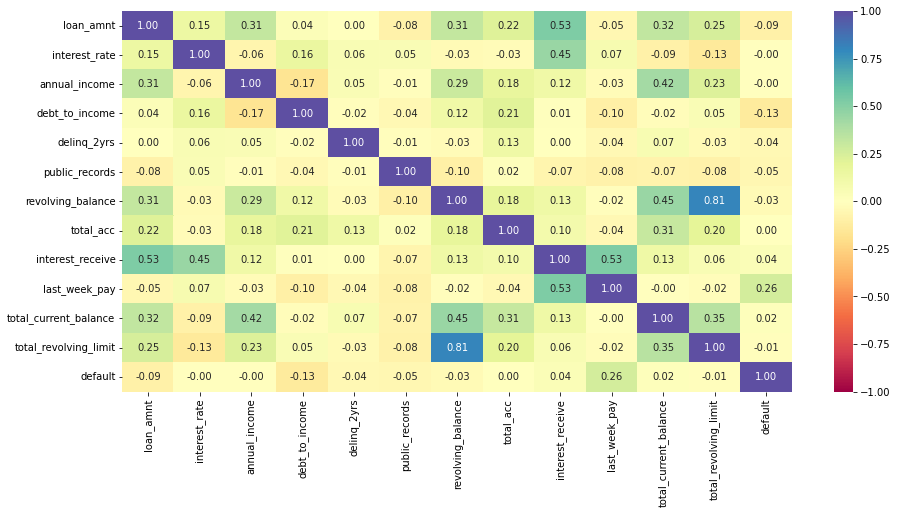

In [40]:
# selecting numerical columns
num_col = Data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(Data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* No correlation.



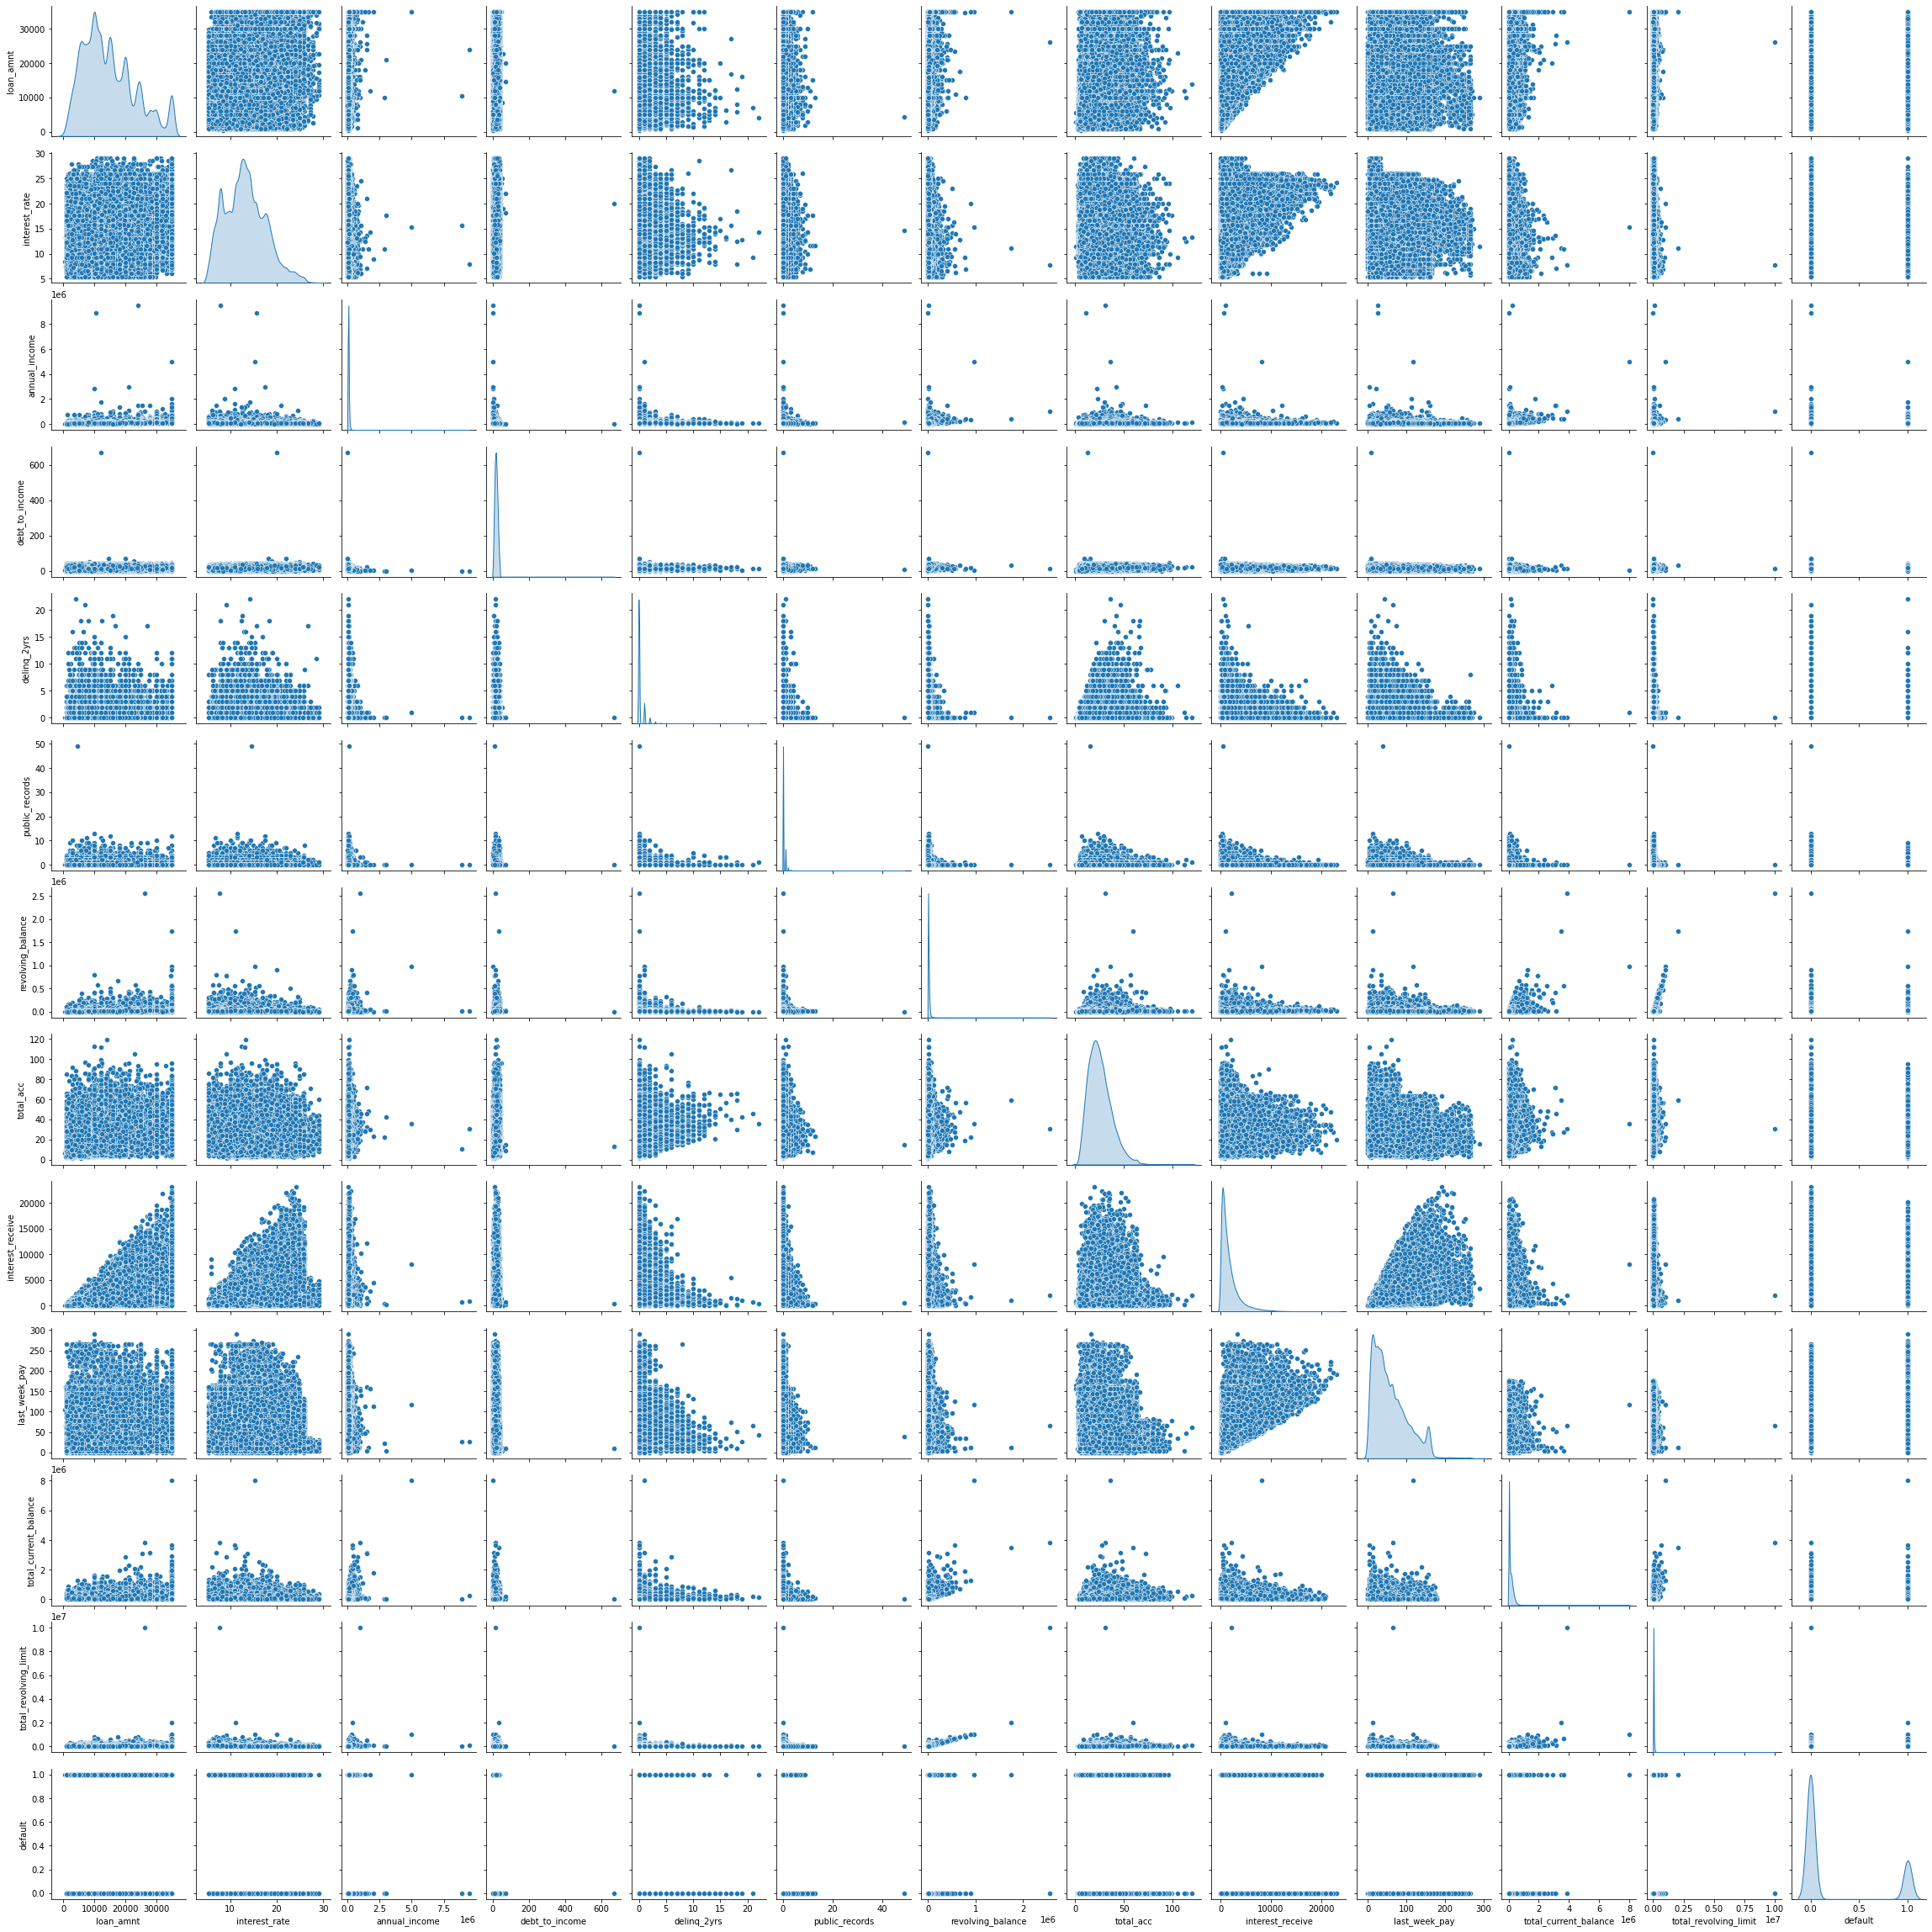

In [41]:
sns.pairplot(data=Data[num_col], diag_kind="kde")
plt.show()

In [42]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

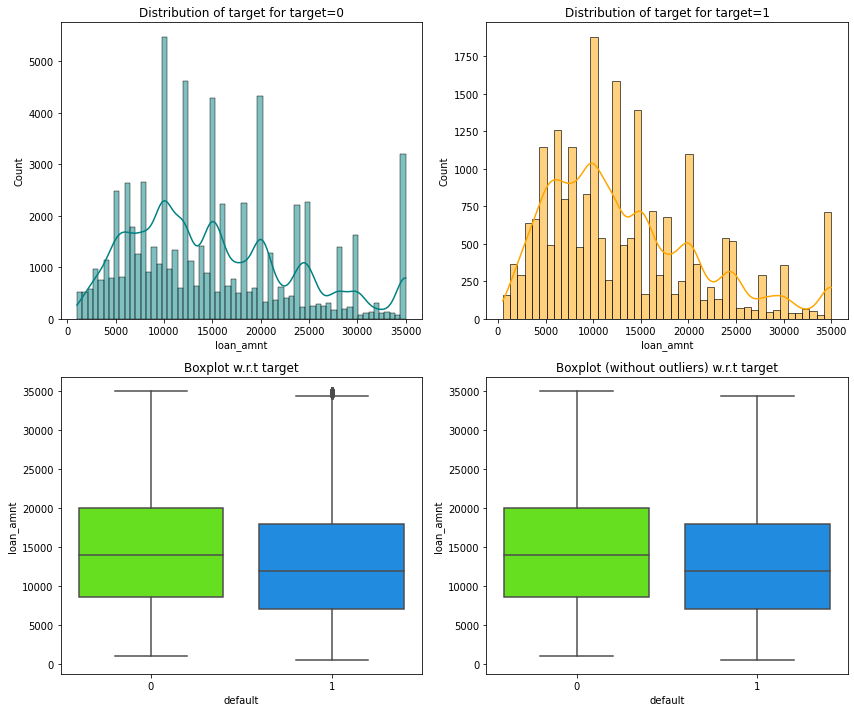

In [43]:
distribution_plot_wrt_target(Data, "loan_amnt", "default")

* CreditScore distribution are same for both type of customers

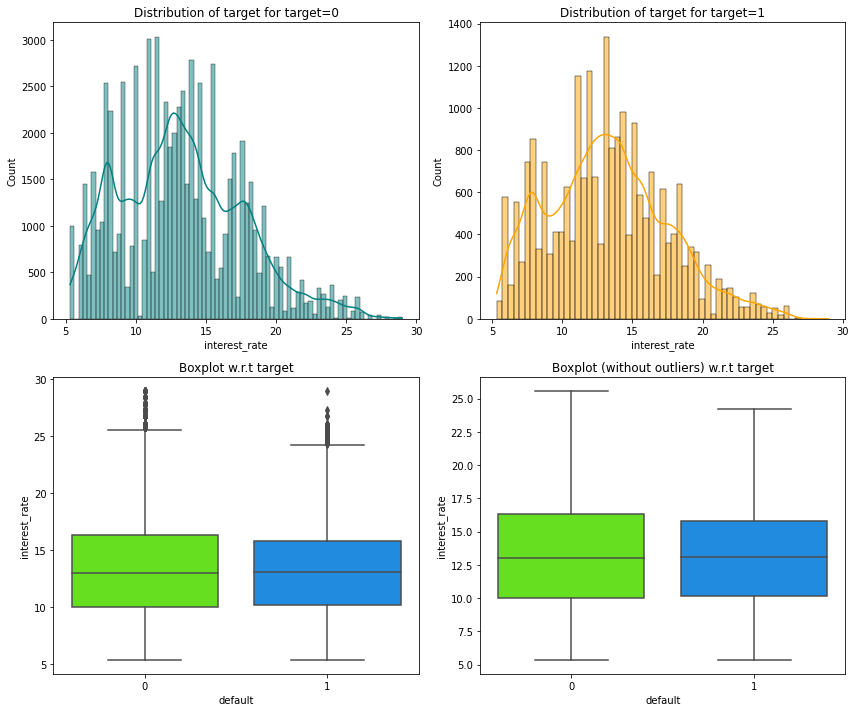

In [44]:
distribution_plot_wrt_target(Data, "interest_rate", "default")

* We observe from the distribution of the Age that more aging customers left the bank.

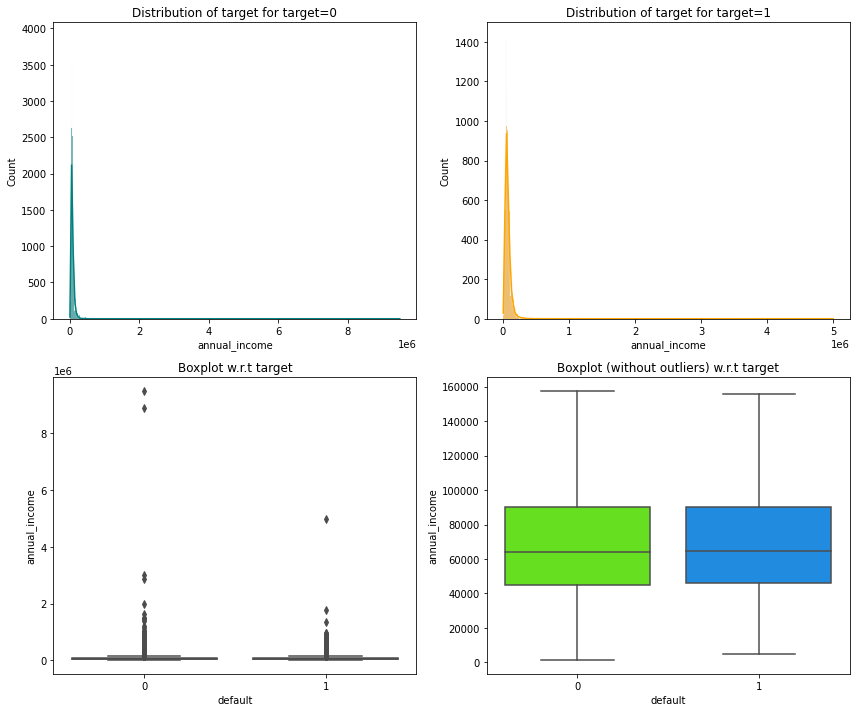

In [45]:
distribution_plot_wrt_target(Data, "annual_income", "default")

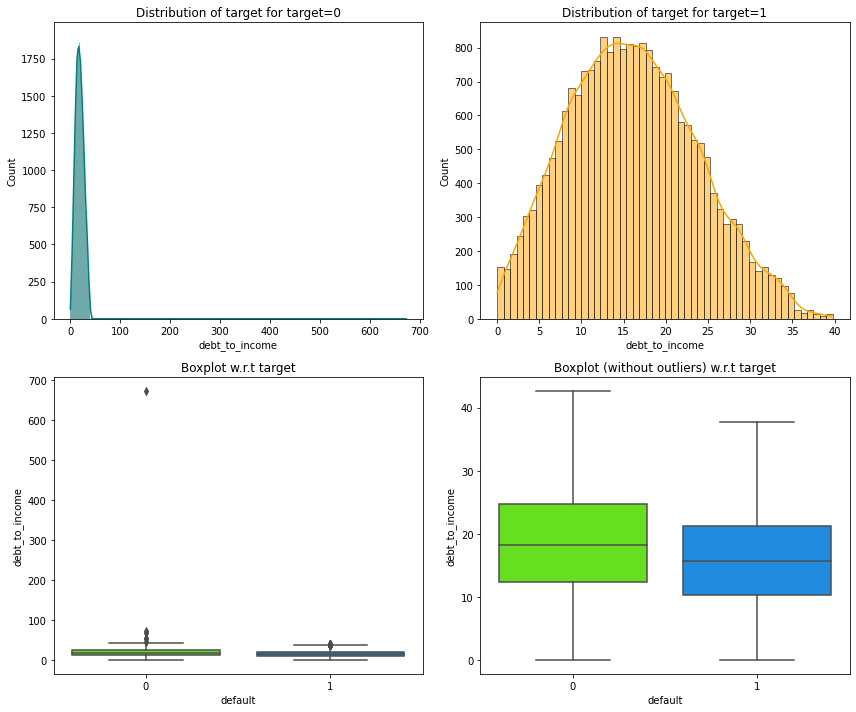

In [46]:
distribution_plot_wrt_target(Data, "debt_to_income", "default")

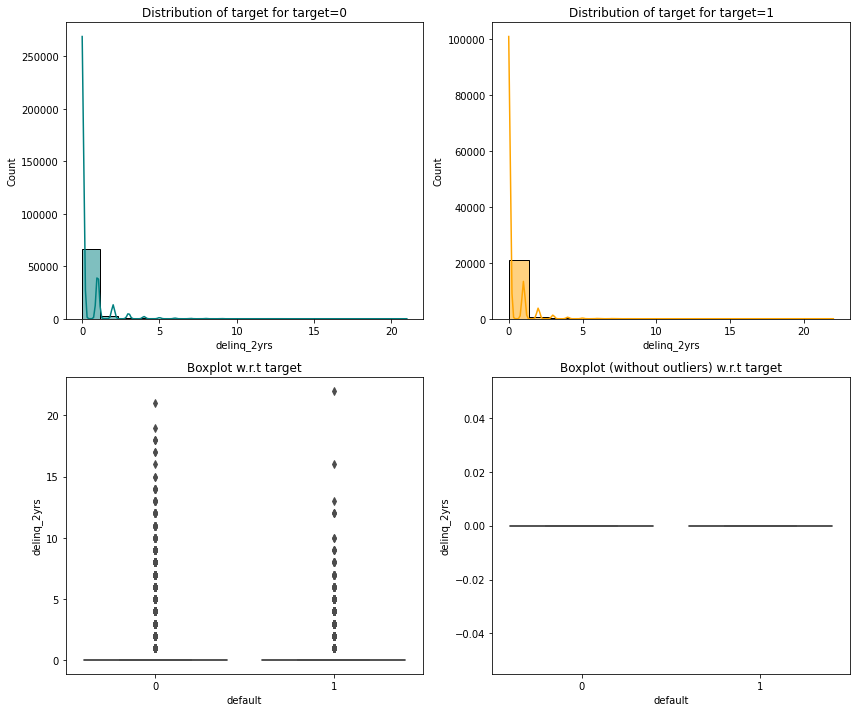

In [47]:
distribution_plot_wrt_target(Data, "delinq_2yrs", "default")

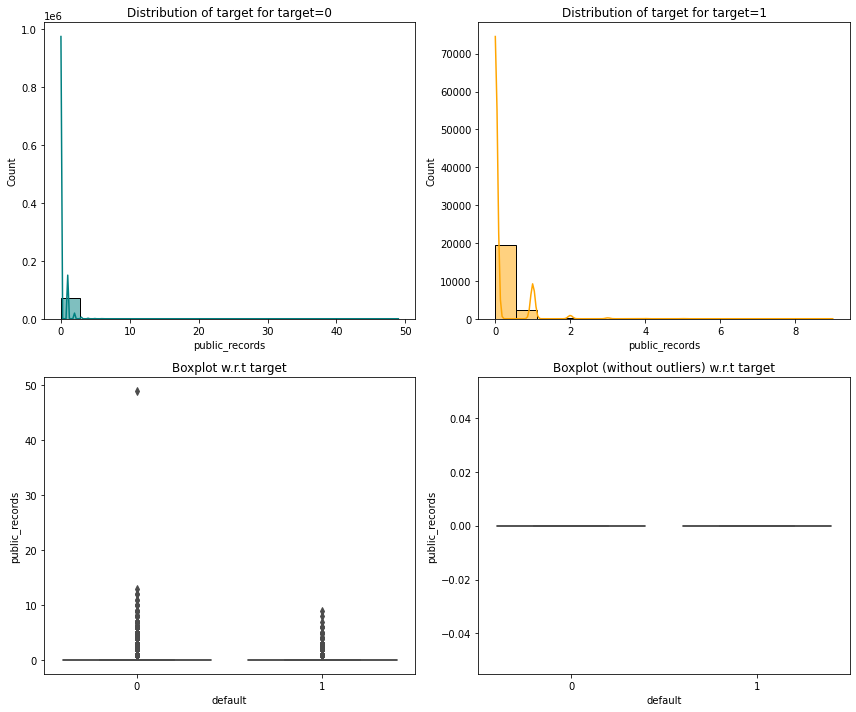

In [48]:
distribution_plot_wrt_target(Data, "public_records", "default")

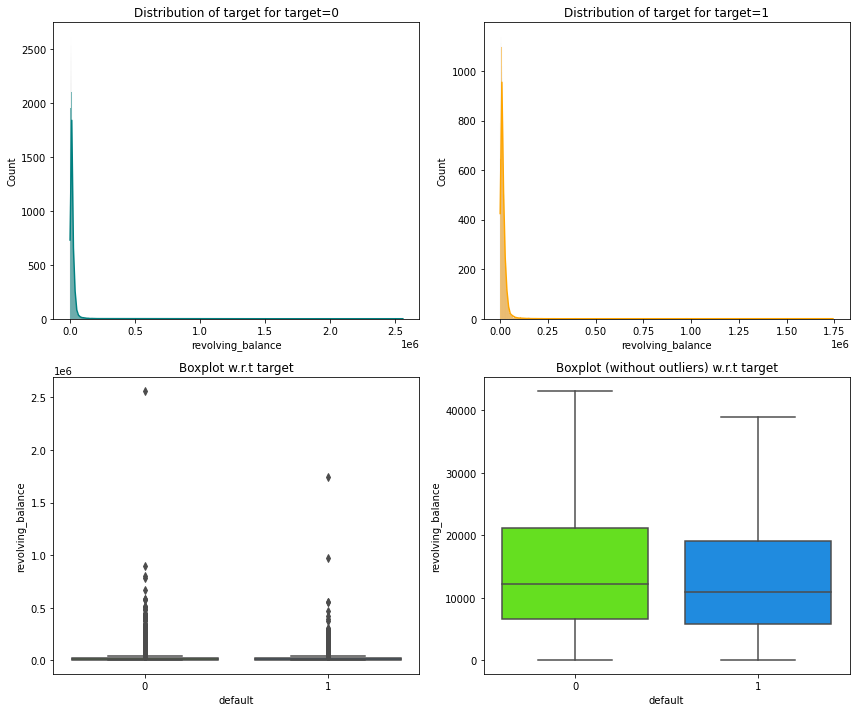

In [49]:
distribution_plot_wrt_target(Data, "revolving_balance", "default")

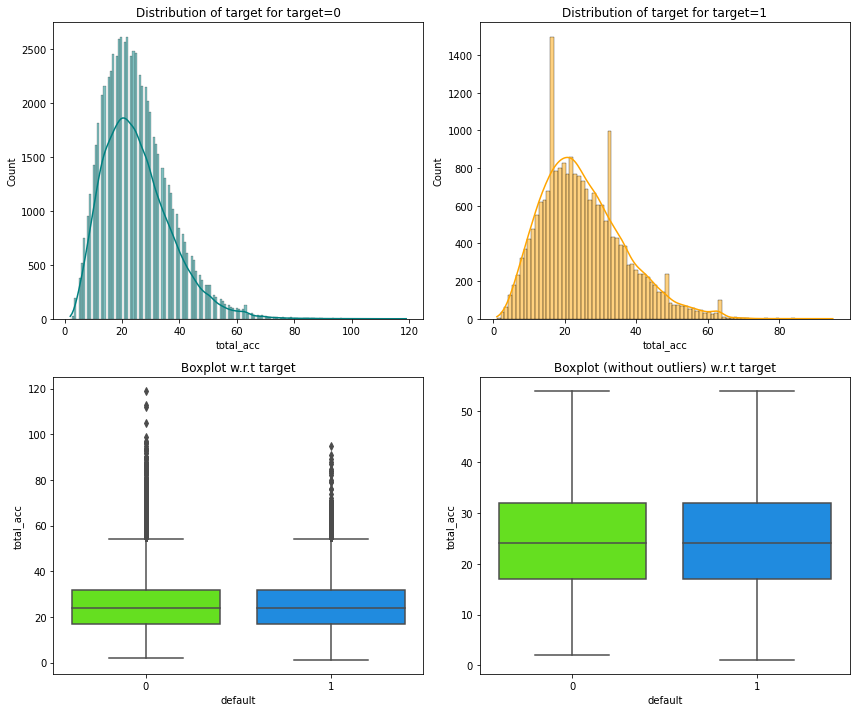

In [50]:
distribution_plot_wrt_target(Data, "total_acc", "default")

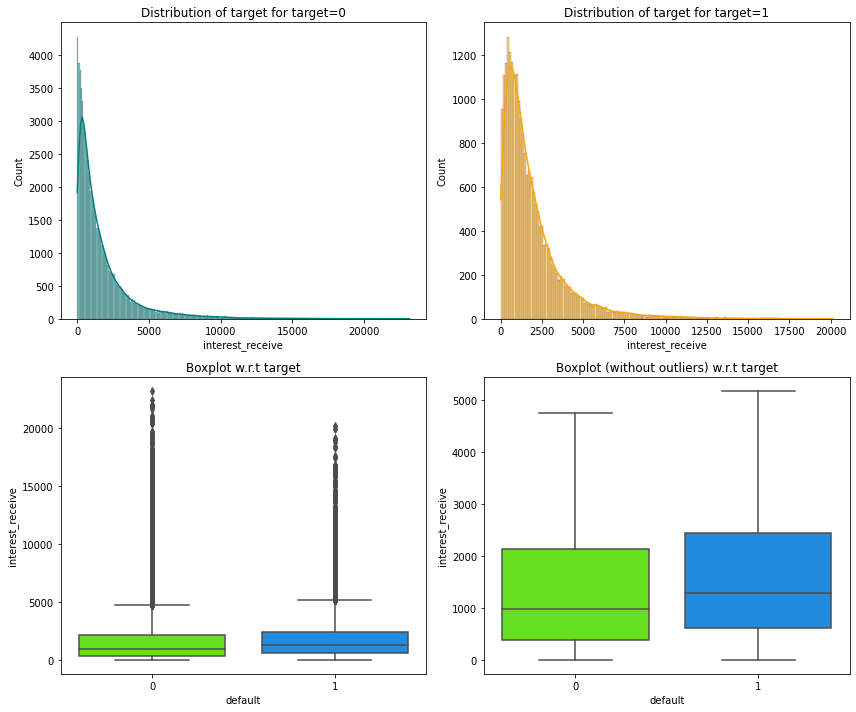

In [51]:
distribution_plot_wrt_target(Data, "interest_receive", "default")

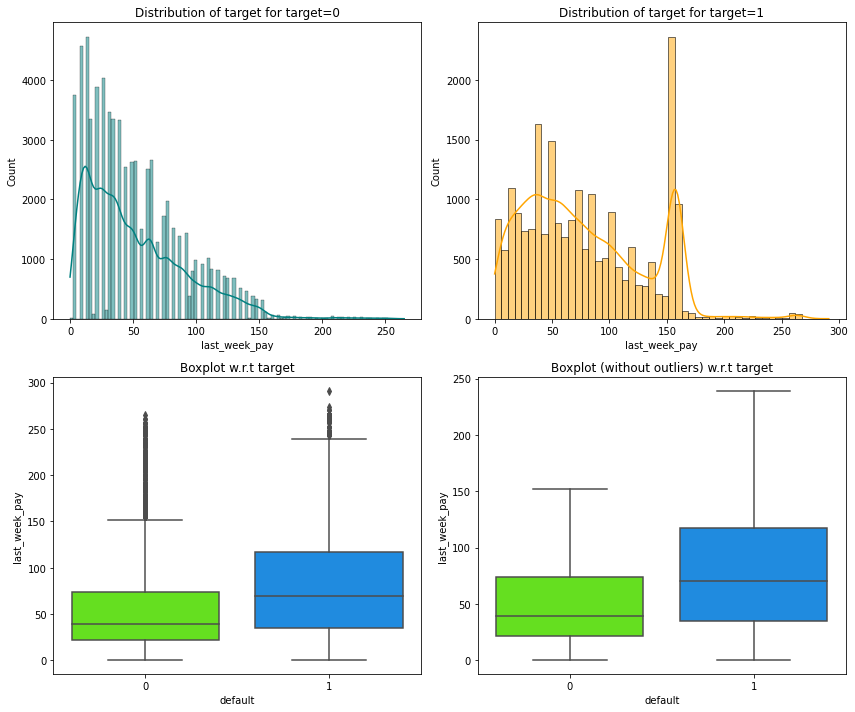

In [52]:
distribution_plot_wrt_target(Data, "last_week_pay", "default")

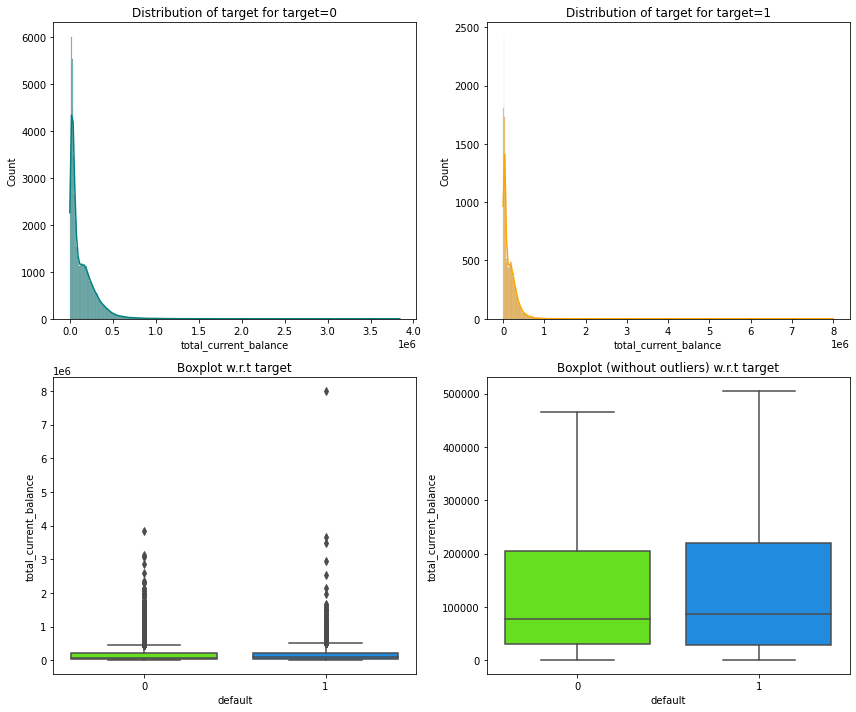

In [53]:
distribution_plot_wrt_target(Data, "total_current_balance", "default")

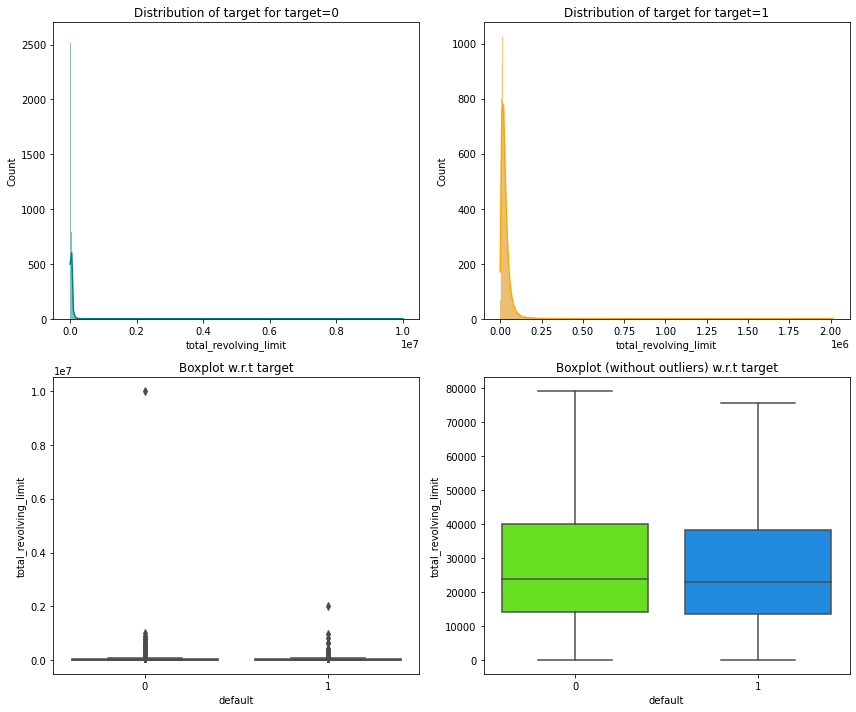

In [54]:
distribution_plot_wrt_target(Data, "total_revolving_limit", "default")

In [55]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

default        0      1    All
loan_term                     
All        71045  22129  93174
3 years    47345  17866  65211
5 years    23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


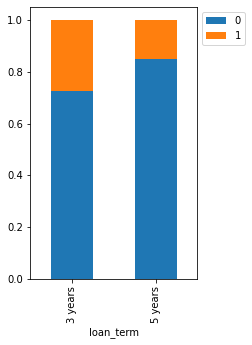

In [56]:
stacked_barplot(Data, "loan_term", "default")

* More percentage of customers from Germany left the bank
* From Spain and France, percentage of customers left the bank are same

default         0      1    All
loan_grade                     
All         71045  22129  93174
B           19787   7078  26865
C           20203   5584  25787
A           11281   4253  15534
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


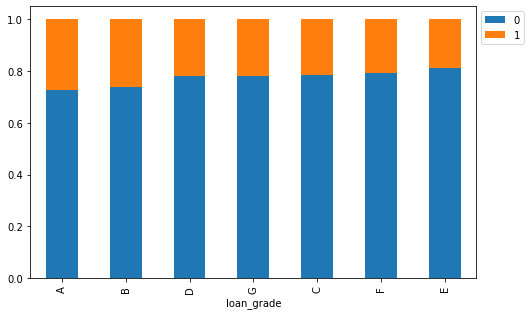

In [57]:
stacked_barplot(Data, "loan_grade", "default")

* From the above plot, we see that Female customers are most likely to left bank.

default            0      1    All
loan_subgrade                     
All            71045  22129  93174
B3              4196   1683   5879
B4              4335   1544   5879
B2              3750   1419   5169
C1              4152   1291   5443
B5              3837   1258   5095
C2              4264   1215   5479
B1              3669   1174   4843
A5              3558   1165   4723
A4              2502   1129   3631
C3              4150   1120   5270
C4              4161   1021   5182
C5              3476    937   4413
D1              2932    784   3716
D2              2462    777   3239
A3              1731    719   2450
D3              2114    645   2759
A2              1710    643   2353
A1              1780    597   2377
D4              2154    563   2717
D5              1816    468   2284
E1              1598    326   1924
E3              1206    307   1513
E2              1436    300   1736
E4               996    232   1228
E5               767    210    977
F1               590

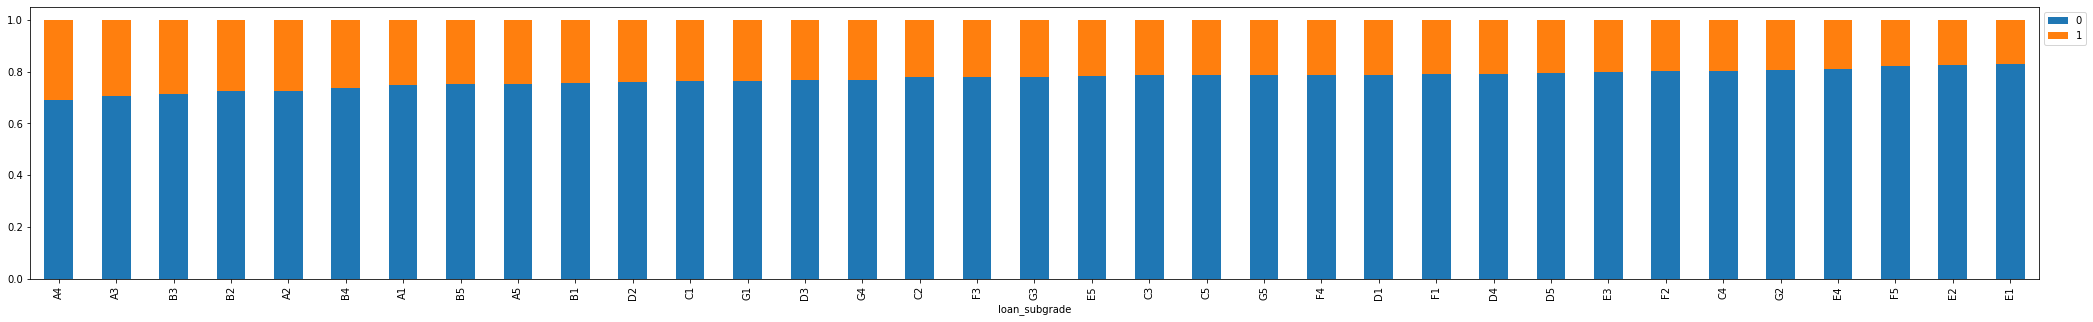

In [58]:
stacked_barplot(Data, "loan_subgrade", "default")

* 4 and 3 products customers mostly left the bank.

default             0      1    All
job_experience                     
All             67140  21332  88472
<5 Years        30377  10233  40610
10+ years       23656   6706  30362
6-10 years      13107   4393  17500
------------------------------------------------------------------------------------------------------------------------


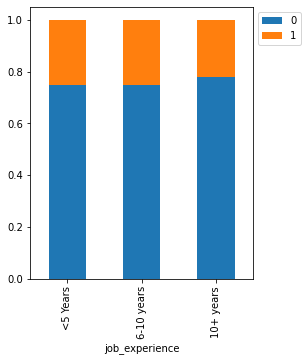

In [59]:
stacked_barplot(Data, "job_experience", "default")

default             0      1    All
home_ownership                     
All             71045  22129  93174
MORTGAGE        35316  11129  46445
RENT            28401   9048  37449
OWN              7323   1931   9254
OTHER               3     15     18
NONE                2      6      8
------------------------------------------------------------------------------------------------------------------------


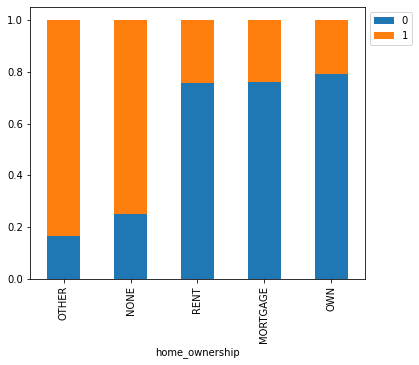

In [60]:
stacked_barplot(Data, "home_ownership", "default")

* Mostly inactive members left the bank

default                         0      1    All
income_verification_status                     
All                         71045  22129  93174
Not Verified                20329   7908  28237
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


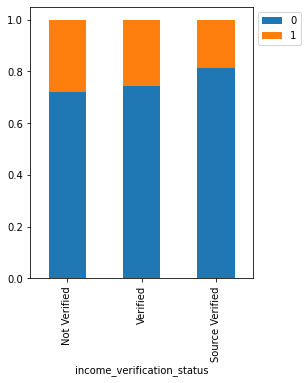

In [61]:
stacked_barplot(Data, "income_verification_status", "default")

default                 0      1    All
loan_purpose                           
All                 71045  22129  93174
debt_consolidation  42408  12833  55241
credit_card         17006   4565  21571
other                7563   3408  10971
home_improvement     4068   1323   5391
------------------------------------------------------------------------------------------------------------------------


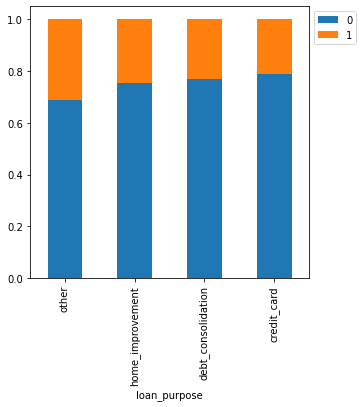

In [62]:
stacked_barplot(Data, "loan_purpose", "default")

default         0      1    All
state_code                     
All         71045  22129  93174
CA           9905   3839  13744
NY           5886   1896   7782
TX           5748   1719   7467
FL           4876   1484   6360
IL           2864    835   3699
NJ           2640    824   3464
PA           2616    705   3321
GA           2324    674   2998
VA           2141    652   2793
OH           2467    637   3104
NC           2050    619   2669
MA           1648    584   2232
MD           1704    575   2279
AZ           1583    532   2115
WA           1517    521   2038
MI           1911    504   2415
CO           1431    493   1924
MN           1254    384   1638
NV            983    343   1326
MO           1144    341   1485
CT           1083    319   1402
OR            805    297   1102
AL            915    273   1188
WI            940    266   1206
SC            847    261   1108
LA            854    258   1112
IN           1188    232   1420
KY            731    202    933
TN      

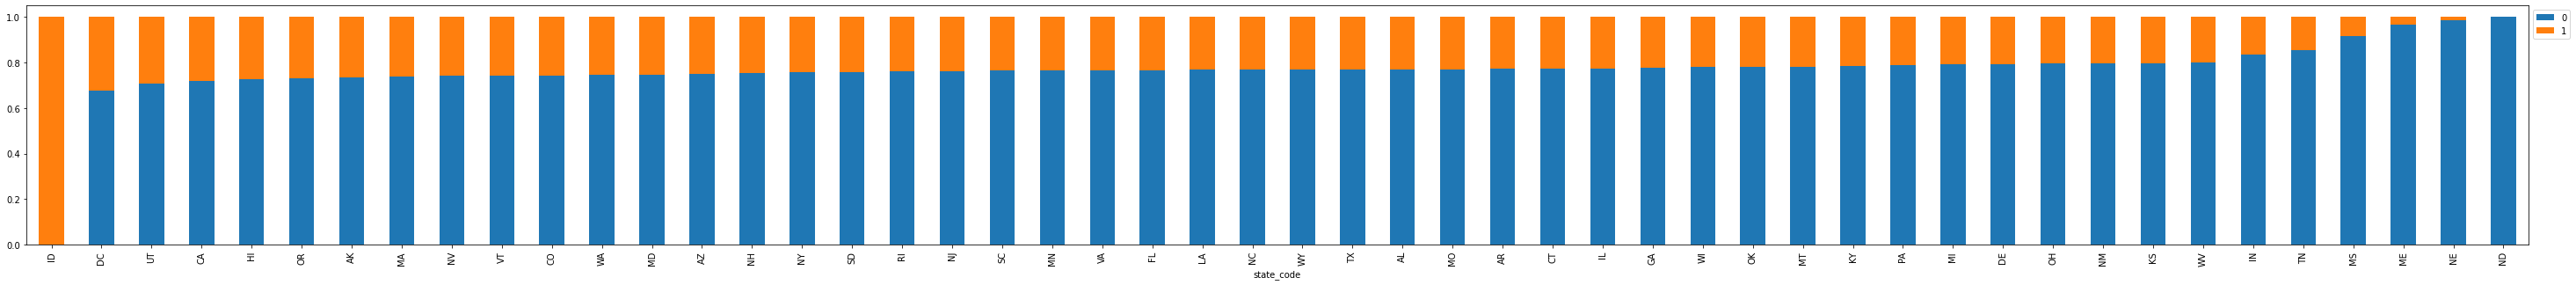

In [63]:
stacked_barplot(Data, "state_code", "default")

default               0      1    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


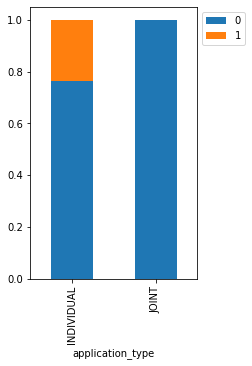

In [64]:
stacked_barplot(Data, "application_type", "default")

## **Train Data Preprocessing**

In [65]:
#Data[
#    [
#        "annual_income",
#        "delinq_2yrs",
#        "public_records",
#        "total_acc",
#        "last_week_pay",
#        "total_current_balance",
#        "total_revolving_limit",
#    ]
#] = Data[
#    [
#        "annual_income",
#        "delinq_2yrs",
#        "public_records",
#        "total_acc",
#        "last_week_pay",
#        "total_current_balance",
#        "total_revolving_limit",
#    ]
#].transform(
#    lambda x: x.fillna(x.median())
#)
#Data.isnull().sum()

In [66]:
#Data.job_experience.value_counts()

In [67]:
#Data[
#    [
#        "job_experience"
#    ]
#] = Data[
#    [
#        "job_experience"
#    ]
#].transform(lambda x: x.fillna(x.value_counts().index[0]))
#Data.job_experience.value_counts()

In [68]:
# copy dataframe to another one for modifying 
df = pd. DataFrame(Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   93174 non-null  int64  
 1   loan_term                   93174 non-null  object 
 2   interest_rate               93174 non-null  float64
 3   loan_grade                  93174 non-null  object 
 4   loan_subgrade               93174 non-null  object 
 5   job_experience              88472 non-null  object 
 6   home_ownership              93174 non-null  object 
 7   annual_income               93173 non-null  float64
 8   income_verification_status  93174 non-null  object 
 9   loan_purpose                93174 non-null  object 
 10  state_code                  93174 non-null  object 
 11  debt_to_income              93174 non-null  float64
 12  delinq_2yrs                 93172 non-null  float64
 13  public_records              931

#### Test Data Load

In [69]:
Data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Hackathons/Test_set.csv')

In [70]:
Data_test.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,debt_consolidation,CA,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,credit_card,VA,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,debt_consolidation,TX,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,credit_card,NJ,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,debt_consolidation,CA,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0


In [71]:
df_test = Data_test.copy()

In [72]:
df_test.info()
# ID columns consists of uniques ID for customers and hence will not add value to the modeling
df_test.drop(['ID'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [74]:
df_test.isna().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

#### Impute Data

In [75]:
# spply impute function to convert  cateogry into numeric 
loan_term = {"3 years": 3, "5 years": 5}
loan_grade = {"A": 0, "B": 1,"C": 2,"D": 3,"E": 4,"F": 5,"G": 6}
job_experience = {"<5 Years": 0, "10+ years": 1,"6-10 years": 2}
home_ownership = {"MORTGAGE": 0, "RENT": 1, "OWN" : 2, "OTHER": 3, "NONE" : 4}
income_verification_status = {"Source Verified": 0, "Verified": 1,"Not Verified" : 2}
loan_purpose = {"debt_consolidation": 0, "credit_card": 1, "other" : 2, "home_improvement": 3}
application_type = {"INDIVIDUAL": 0, "JOINT": 1}
loan_subgrade = {"A1": 0, "A2": 1, "A3" : 2, "A4": 3, "A5" : 4,"A6": 5,"B1": 6, "B2":7, "B3":8, "B4":9,"B5":10,"B6":11, "C1": 12 , "C2": 13 ,"C3": 14 , "C4": 15,"C5": 16 , "C6": 17, "D1" : 18, "D2" : 19, "D3" : 20, "D4" : 21 , "D5" : 22 , "D6" : 27, "E1" : 28,  "E2" : 29,"E3" : 30,  "E4" : 31, "E5" : 32,  "E6" : 33, "F1": 34, "F2": 35,"F3": 35, "F4": 36,"F5": 37, "F6": 38,"G1" : 39, "G2" : 40, "G4" : 42, "G3": 41, "G5" : 44, "G6" :45 }
state_code = {"CA": 0,"NY": 1, "TX": 2, "FL": 3, "IL": 4, "NJ": 5, "PA": 6,"OH":7,"GA": 8, "VA": 9, "NC": 10, "MI": 11, "MD": 12 , "MA": 13, "AZ":  14, "WA": 15, "CO": 16,"MN": 17, "MO": 18, "IN": 19, "CT": 20, "TN": 21, "NV": 22, "WI": 23, "AL": 24,"LA": 25, "SC": 26, "OR": 27, "KY":  28, "OK": 29, "KS": 30, "AR": 31,"UT": 32,"NM": 33,"WV": 34,"HI": 35,"NH": 36,"RI": 37,"MS": 38,"DC": 39,"MT": 40,"DE": 41,"AK": 42,"WY": 44,"SD":  45,"VT":  46,"NE":  47,"ME":  48,"ND":  49,"ID": 50}


In [76]:
df["loan_term"] = df["loan_term"].map(loan_term)
df["loan_grade"] = df["loan_grade"].map(loan_grade)
df["job_experience"] = df["job_experience"].map(job_experience)
df["home_ownership"] = df["home_ownership"].map(home_ownership)
df["income_verification_status"] = df["income_verification_status"].map(income_verification_status)
df["loan_purpose"] = df["loan_purpose"].map(loan_purpose)
df["application_type"] = df["application_type"].map(application_type)
df["loan_subgrade"] = df["loan_subgrade"].map(loan_subgrade)
df["state_code"] = df["state_code"].map(state_code)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   93174 non-null  int64  
 1   loan_term                   93174 non-null  int64  
 2   interest_rate               93174 non-null  float64
 3   loan_grade                  93174 non-null  int64  
 4   loan_subgrade               93174 non-null  int64  
 5   job_experience              88472 non-null  float64
 6   home_ownership              93174 non-null  int64  
 7   annual_income               93173 non-null  float64
 8   income_verification_status  93174 non-null  int64  
 9   loan_purpose                93174 non-null  int64  
 10  state_code                  93174 non-null  int64  
 11  debt_to_income              93174 non-null  float64
 12  delinq_2yrs                 93172 non-null  float64
 13  public_records              931

In [77]:
df_test["loan_term"] = df_test["loan_term"].map(loan_term)
df_test["loan_grade"] = df_test["loan_grade"].map(loan_grade)
df_test["job_experience"] = df_test["job_experience"].map(job_experience)
df_test["home_ownership"] = df_test["home_ownership"].map(home_ownership)
df_test["income_verification_status"] = df_test["income_verification_status"].map(income_verification_status)
df_test["loan_purpose"] = df_test["loan_purpose"].map(loan_purpose)
df_test["application_type"] = df_test["application_type"].map(application_type)
df_test["loan_subgrade"] = df_test["loan_subgrade"].map(loan_subgrade)
df_test["state_code"] = df_test["state_code"].map(state_code)

In [78]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [79]:
## Separating Independent and Dependent Columns
X = df.drop(['default'],axis=1)
Y = df[['default']]

In [80]:
## Separating Independent and Dependent Columns
#X = Data.drop(['default'],axis=1)
#Y = Data[['default']]

In [81]:
reqd_col_for_impute = ["job_experience" , "annual_income", "delinq_2yrs", "public_records" , "total_acc" , "last_week_pay", "total_current_balance", "total_revolving_limit"]

In [82]:
# Fit and transform the train data
X[reqd_col_for_impute] = imputer.fit_transform(X[reqd_col_for_impute])

# Transform the test data
df_test[reqd_col_for_impute] = imputer.transform(df_test[reqd_col_for_impute])

In [83]:
# Checking that no column has missing values in train, validation or test sets
print(X.isna().sum())
print("-" * 30)
print(df_test.isna().sum())

loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64
------------------------------
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status  

In [84]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X[y] = np.round(X[y]).map(inv_dict).astype("category")
    df_test[y] = np.round(df_test[y]).map(inv_dict).astype("category")

In [85]:
inverse_mapping(loan_term, "loan_term")
inverse_mapping(loan_grade, "loan_grade")
inverse_mapping(loan_subgrade, "loan_subgrade")
inverse_mapping(job_experience, "job_experience")
inverse_mapping(home_ownership, "home_ownership")
inverse_mapping(income_verification_status, "income_verification_status")
inverse_mapping(loan_purpose, "loan_purpose")
inverse_mapping(state_code, "state_code")
inverse_mapping(application_type, "application_type")

#### Adding dummy variables for category columns and Creating training and test data sets

In [86]:
oneHotCols = [
    "loan_term",
    "loan_grade",
    "loan_subgrade",
    "job_experience",
    "home_ownership",
    "income_verification_status",
    "loan_purpose",
    "state_code",
    "application_type"
]
X = pd.get_dummies(data=X, columns=oneHotCols, drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=oneHotCols, drop_first=True)

In [87]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size = 0.2, random_state = 35,stratify = Y)

In [88]:
X_train.head()

,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,...,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT
57626,21350,18.25,90000.0,17.39,0.0,0.0,24935,35.0,2479.19,35.0,128346.0,29400.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6051,18000,12.29,92000.0,15.59,0.0,0.0,22148,33.0,534.02,13.0,263890.0,30700.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
42718,10000,15.31,73000.0,16.52,0.0,0.0,13231,29.0,1986.04,87.0,28653.0,17800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87128,27200,9.17,62000.0,16.65,0.0,0.0,21867,29.0,0.00,146.2,281774.0,83300.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63728,24000,9.17,84000.0,15.21,0.0,0.0,22985,23.0,694.55,17.0,294025.0,37000.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
df_test.head()

,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,...,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT
0,12000,15.31,73400.0,14.62,0.0,0.0,22156,30.0,2290.24,87.0,128098.0,25800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12000,7.26,105000.0,11.38,0.0,0.0,7592,14.0,202.68,13.0,269396.0,23600.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,15000,14.33,50000.0,28.15,0.0,1.0,17983,19.0,1166.24,30.0,220135.0,34100.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,12000,9.99,37000.0,34.32,0.0,0.0,12262,18.0,635.06,35.0,39436.0,21700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20150,11.53,75000.0,26.74,1.0,0.0,8251,11.0,1232.84,31.0,52764.0,12000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
y_train.head()

,default
57626,0
6051,0
42718,1
87128,0
63728,0


In [91]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(74539, 113)
(18635, 113)
(74539, 1)
(18635, 1)


In [92]:
## Scaling the data
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

## **Model Building**

#### **A model can make wrong predictions in the following ways:**
* Predicting an employee is looking for a job, when he/she is not looking for it. 
* Predicting an employee is not looking for a job, when he/she is in fact looking for one.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. Not giving a chance to a deserving employee (by wrongly classifying them as likely to attrite) might lead to decreased productivity, and the company might lose a good employee affecting the organization's growth. However, giving chances to a non-deserving employee (as they are likely to attrite) would lead to a financial loss for the company, and giving such employees an increased amount of responsibility might again affect the company's growth.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.


### Model 1

In [93]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [94]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 113, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [95]:
# Create optimizer with default learning rate
# Compile the model
#sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True,clipnorm=100)
#model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7296      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,409
Trainable params: 9,409
Non-trainable params: 0
_________________________________________________________________


In [97]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1864/1864 [==============================] - 6s 2ms/step - loss: 0.5331 - accuracy: 0.7623 - val_loss: 0.5166 - val_accuracy: 0.7666
Epoch 2/50
1864/1864 [==============================] - 4s 2ms/step - loss: 0.5025 - accuracy: 0.7743 - val_loss: 0.5065 - val_accuracy: 0.7680
Epoch 3/50
1864/1864 [==============================] - 4s 2ms/step - loss: 0.4941 - accuracy: 0.7768 - val_loss: 0.5017 - val_accuracy: 0.7681
Epoch 4/50
1864/1864 [==============================] - 4s 2ms/step - loss: 0.4888 - accuracy: 0.7787 - val_loss: 0.4990 - val_accuracy: 0.7707
Epoch 5/50
1864/1864 [==============================] - 4s 2ms/step - loss: 0.4849 - accuracy: 0.7796 - val_loss: 0.4972 - val_accuracy: 0.7726
Epoch 6/50
1864/1864 [==============================] - 4s 2ms/step - loss: 0.4816 - accuracy: 0.7808 - val_loss: 0.4940 - val_accuracy: 0.7723
Epoch 7/50
1864/1864 [==============================] - 4s 2ms/step - loss: 0.4783 - accuracy: 0.7818 - val_loss: 0.4928 - val_accuracy:

583/583 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8169


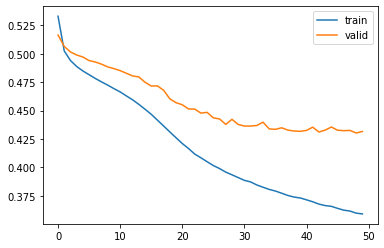

In [98]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_val, y_val)

From the above plot, we observe that both curves - train and validation, are smooth. 

Let's check the other metrices.

In [99]:
y_pred=model.predict(X_val)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [100]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

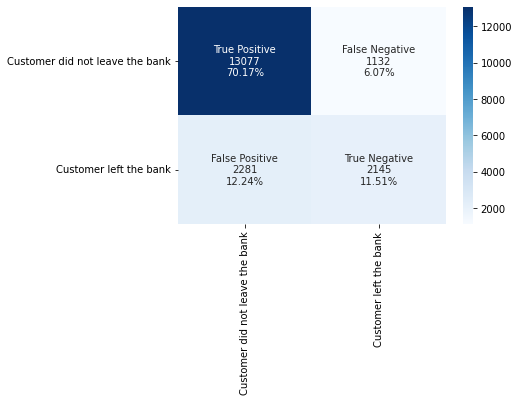

In [101]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, the 3.2% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve. 

In [102]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     14209
           1       0.65      0.48      0.56      4426

    accuracy                           0.82     18635
   macro avg       0.75      0.70      0.72     18635
weighted avg       0.80      0.82      0.81     18635



As you can see, the above model has a good accuracy but a poor F1-score. This could be due to the imbalanced dataset. We observe that the False positive rates are also high, which should be considerably lower. 

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model1.summary()

In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, we can see smoother loss curves for train data and noise in the valoidation. Model seems to have overfitted on the training data because there is a significant difference in performance between train and validation.


In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_val)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_val, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [ ]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_val)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_val, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred_e1)
print(cr)

As the number of layers in the neural network has increased, we can see that the macro F1 score has decreased, and the False Negative percentage has increased. 

Now let's try to use the Batch Normalization technique and check to see if we can increase the F1 score. 

### Model 3

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Unfortunately, from the above plot we observe that there is a smoother loss curves for train data and noise in the valoidation. Model seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_val)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_val, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e2=model2.predict(X_val)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_val, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_val,y_pred_e2)
print(cr2)

The Train and Validation curves seem to show overfitting despite having a good F1 score and a low False Negative rate. 

Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate. 

### Model 4

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model3.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, we can see smoother loss curves for train and valoidation. Model seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_val)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_val, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e3=model3.predict(X_val)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_val, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_val,y_pred_e3)
print(cr3)

The Dropout technique helped the model reduce the loss function of both train and validation. The F1 score also seems to be fine, with a decrease in the False Negative rate.

Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

### Model 5

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.



In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128, 256],
    "lr":[0.01,0.1,0.001,0.0001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [ ]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the validation behavior of the model.

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_val)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_val, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e4=estimator_v4.predict(X_val)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_val, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_val,y_pred_e4)
print(cr4)

Hyperparameter tuning is used here to get a better F1 score, but the F1 score may differ each time. 

Other hyperparameters can also be tuned to get better performance on the metrics. 

Here, the F1 score of the model has increased in comparison to the previous best performance. 

Let's use the more exhaustive Grid Search CV and see if the F1 score increases. 

### Model 6

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**. 

You can also optimize the other hyperparameters as mentioned above.

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

The best model has the following configuration: 

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [ ]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both curves - train and validation, has noise.

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_val)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_val, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e5=estimator_v5.predict(X_val)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_val, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_val,y_pred_e5)
print(cr5)

Hyperparameter tuning with Grid Search has been used here to get a better F1 score, but the F1 score might differ each time. 

Other hyperparameters can also be tuned to get better metrics. 

Here, the F1 score of the model, while less than in Randomized Search, is slightly higher than in Model 4 (the Dropout model).

### Dask

* There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure. 
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn. 

You may install the Dask library in Anaconda prompt using the below code:
* !pip install dask-ml --user

In [ ]:
# Try below code to install dask in Google Colab
!pip install dask-ml 

In [ ]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

Try to run the code twice if you encounter any error while improting Dask

* Dask is the same as regular Grid Search in its functioning. 
* We just have to change the function from GridSearchCV to DaskGridSearchCV.

In [ ]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

* The dimension of the dataset should be large.
* Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.

Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

We can also use another optimization technique - Keras Tuner.

In [ ]:
## Install Keras Tuner
!pip install keras-tuner 

### Keras Tuner

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [ ]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [ ]:
tuner.search_space_summary()

In [ ]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

In [ ]:
## Printing the best models with their hyperparameters
tuner.results_summary()

### Model 7

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model7.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the train and validation curves are smooth. Model seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_val)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_val, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e7=model7.predict(X_val)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_val, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_val,y_pred_e7)
print(cr7)

* After using the suggested hyperparameters from Keras Tuner, the F1 score been decreased, and the False Negative rate is higher in comparison to the previous optimization technique model.

* Further, you can add Batch Normalization and Dropout to the model and check the F1 score. 

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [ ]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

In [ ]:
tuner_2.search_space_summary()

In [ ]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

In [ ]:
tuner_2.results_summary()

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model9.summary()

In [ ]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model.

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_val)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_val, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e9=model9.predict(X_val)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_val, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_val,y_pred_e9)
print(cr6)

After applying the SMOTE technique to the data, the F1 score decreased, and the False Negative rate increased. 

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [ ]:
backend.clear_session()
np.random.seed(35)
import random
random.seed(35)
tf.random.set_seed(35)

In [ ]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model. 

Grid Search CV also does not seem to work that well on the SMOTE data.

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_val)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_val, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e10=estimator_v7.predict(X_val)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_val, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Customer did not leave the bank','Customer left the bank']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_val,y_pred_e10)
print(cr10)

Oversampling using SMOTE did not help improve the F1 score. 

In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.

So, our final model here can be **Model 5**, which uses the Random Search CV technique and works on the imbalanced dataset.



## **Predict Test Data**

In [ ]:
test_predict = model.predict(df_test)